Problem

Analyse and find the travel habits between customers and non-customers.

Is it true the customers prefer to travel often(buying tickets from frequent flyer miles) and travel abroad?


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
travel_insurance = pd.read_csv(r'C:\Users\rafai\Desktop\Python\Final exam data analyst\travel_insurance.csv')

In [4]:
pd.set_option('display.max_columns', None)

In [5]:
print(travel_insurance['Employment Type'].unique())
print(travel_insurance.describe())

['Government Sector' 'Private Sector/Self Employed']
               Age  AnnualIncome  FamilyMembers  ChronicDiseases  \
count  1987.000000  1.987000e+03    1987.000000      1987.000000   
mean     29.650226  9.327630e+05       4.752894         0.277806   
std       2.913308  3.768557e+05       1.609650         0.448030   
min      25.000000  3.000000e+05       2.000000         0.000000   
25%      28.000000  6.000000e+05       4.000000         0.000000   
50%      29.000000  9.000000e+05       5.000000         0.000000   
75%      32.000000  1.250000e+06       6.000000         1.000000   
max      35.000000  1.800000e+06       9.000000         1.000000   

       TravelInsurance  
count      1987.000000  
mean          0.357323  
std           0.479332  
min           0.000000  
25%           0.000000  
50%           0.000000  
75%           1.000000  
max           1.000000  


In [6]:
travel_insurance_overview = travel_insurance

travel_insurance_overview['FrequentFlyer'] = travel_insurance_overview['FrequentFlyer'].replace('No', False)
travel_insurance_overview['FrequentFlyer'] = travel_insurance_overview['FrequentFlyer'].replace('Yes', True)
travel_insurance_overview['Employment Type'] = travel_insurance_overview['Employment Type'].replace('Government Sector', False)
travel_insurance_overview['Employment Type'] = travel_insurance_overview['Employment Type'].replace('Private Sector/Self Employed', True)
travel_insurance_overview['EverTravelledAbroad'] = travel_insurance_overview['EverTravelledAbroad'].replace('No', False)
travel_insurance_overview['EverTravelledAbroad'] = travel_insurance_overview['EverTravelledAbroad'].replace('Yes', True)
travel_insurance_overview['TravelInsurance'] = travel_insurance_overview['TravelInsurance'].replace(0, False)
travel_insurance_overview['TravelInsurance'] = travel_insurance_overview['TravelInsurance'].replace(1, True)
travel_insurance_overview['GraduateOrNot'] = travel_insurance_overview['GraduateOrNot'].replace('No', False)
travel_insurance_overview['GraduateOrNot'] = travel_insurance_overview['GraduateOrNot'].replace('Yes', True)

In [7]:
print()
print(travel_insurance_overview['TravelInsurance'].sum())
print(travel_insurance_overview['TravelInsurance'].count())
print(travel_insurance_overview)


710
1987
      Age  Employment Type  GraduateOrNot  AnnualIncome  FamilyMembers  \
0      31            False           True        400000              6   
1      31             True           True       1250000              7   
2      34             True           True        500000              4   
3      28             True           True        700000              3   
4      28             True           True        700000              8   
...   ...              ...            ...           ...            ...   
1982   33             True           True       1500000              4   
1983   28             True           True       1750000              5   
1984   28             True           True       1150000              6   
1985   34             True           True       1000000              6   
1986   34             True           True        500000              4   

      ChronicDiseases  FrequentFlyer  EverTravelledAbroad  TravelInsurance  
0                   1   

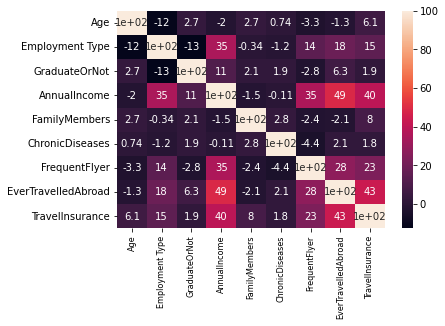

In [8]:

sns.heatmap(travel_insurance.corr()*100, annot = True)
plt.xticks(rotation = 90, fontsize = 8)
plt.show()

Correlation

Annual Income / Insurance  40% (Frequent Flyer/ Travelled Abroad)

Frequent Flayer / Insurance 23%  (Ever Travelled Abroad)

Ever Travelled Abroad / Insurance 43%

In [9]:
'''Cut'''
income_ranges = [0,600000,900000,1200000,1500000,np.inf]
income_groups = ['300k-600k','600k-900k','900k-1200k','1200k-1500k','1500k-1800k']
travel_insurance_overview['Income group'] = pd.cut(travel_insurance_overview['AnnualIncome'], bins=income_ranges, labels=income_groups)

print()
employment_type_results = travel_insurance_overview.groupby(['TravelInsurance','Employment Type']).agg({'AnnualIncome':[np.count_nonzero,np.mean],'EverTravelledAbroad':np.mean})
print(employment_type_results)
x= employment_type_results.loc[:]
y = employment_type_results.loc[:,('AnnualIncome', 'count_nonzero')]
print('.............')
print(x)
print(y.values)
stacked = employment_type_results.loc[:,('EverTravelledAbroad', 'mean')].values * y
print(stacked)
print('...............')


                                 AnnualIncome                \
                                count_nonzero          mean   
TravelInsurance Employment Type                               
False           False                     430  6.639535e+05   
                True                      847  9.011806e+05   
True            False                     140  9.139286e+05   
                True                      570  1.187105e+06   

                                EverTravelledAbroad  
                                               mean  
TravelInsurance Employment Type                      
False           False                      0.044186  
                True                       0.074380  
True            False                      0.185714  
                True                       0.477193  
.............
                                 AnnualIncome                \
                                count_nonzero          mean   
TravelInsurance Employment Type        

                               AnnualIncome  EverTravelledAbroad
TravelInsurance FrequentFlyer                                   
False           False                  1099             0.056415
                True                    178             0.112360
True            False                   471             0.318471
                True                    239             0.619247


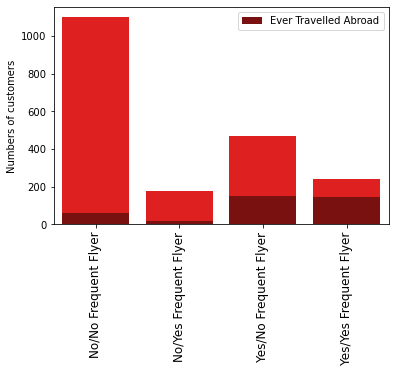

In [10]:
frequentflayer_results = travel_insurance_overview.groupby(['TravelInsurance', 'FrequentFlyer']).agg({'AnnualIncome': np.count_nonzero, 'EverTravelledAbroad':np.mean})
print(frequentflayer_results)

x3 = frequentflayer_results.loc[:]
y3 = frequentflayer_results.loc[:,'AnnualIncome'].values
stacked3 = frequentflayer_results.loc[:,'EverTravelledAbroad'].values * y3
sns.barplot(x=['No/No Frequent Flyer','No/Yes Frequent Flyer','Yes/No Frequent Flyer','Yes/Yes Frequent Flyer'], y=y3, color = 'Red')
sns.barplot(x=['No/No Frequent Flyer','No/Yes Frequent Flyer','Yes/No Frequent Flyer','Yes/Yes Frequent Flyer'], y =stacked3, color = 'Darkred', label='Ever Travelled Abroad')

plt.ylabel('Numbers of customers')
plt.xticks(rotation = 90,fontsize = 12)
plt.legend()
plt.show()

32%  They don’t prefer Frequent Flyer but prefer insurance, the rest prefer to travel without insurance but they don’t travel frequently

57% travel with insurance and frequently

62% of those they travel abroad

                                     AnnualIncome
TravelInsurance EverTravelledAbroad              
False           False                        1195
                True                           82
True            False                         412
                True                          298


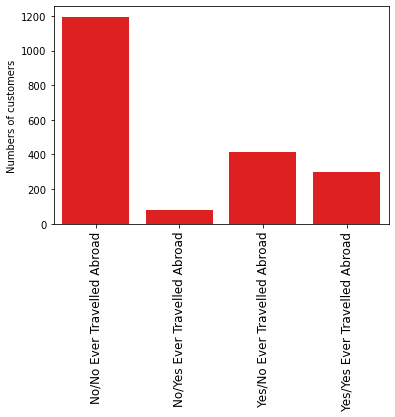

In [11]:
evertravelledabroad_results = travel_insurance_overview.groupby(['TravelInsurance', 'EverTravelledAbroad']).agg({'AnnualIncome':np.count_nonzero})
print(evertravelledabroad_results)
x4 = evertravelledabroad_results.loc[:]
y4 = evertravelledabroad_results.loc[:,'AnnualIncome'].values

sns.barplot(x=['No/No Ever Travelled Abroad','No/Yes Ever Travelled Abroad','Yes/No Ever Travelled Abroad','Yes/Yes Ever Travelled Abroad'], y=y4, color = 'Red')

plt.ylabel('Numbers of customers')
plt.xticks(rotation = 90,fontsize = 12)

plt.show()


78% travel with insurance and abroad

                              AnnualIncome               FrequentFlyer  \
                             count_nonzero          mean          mean   
TravelInsurance Income group                                             
False           300k-600k              443  4.565463e+05      0.067720   
                600k-900k              346  7.877168e+05      0.199422   
                900k-1200k             343  1.108017e+06      0.163265   
                1200k-1500k            130  1.291538e+06      0.138462   
                1500k-1800k             15  1.736667e+06      0.333333   
True            300k-600k              102  5.000000e+05      0.068627   
                600k-900k              124  7.754032e+05      0.177419   
                900k-1200k             118  1.092797e+06      0.152542   
                1200k-1500k            318  1.406132e+06      0.465409   
                1500k-1800k             48  1.694792e+06      0.916667   

                             EverTrav

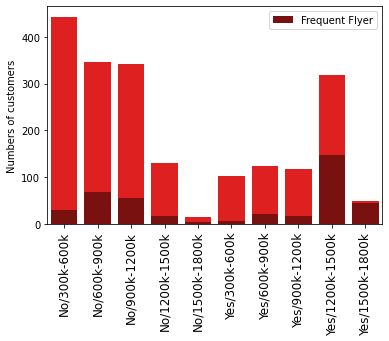

In [12]:

annual_income_results = travel_insurance_overview.groupby(['TravelInsurance', 'Income group']).agg({'AnnualIncome':[np.count_nonzero, np.mean],'FrequentFlyer':[np.mean],'EverTravelledAbroad':np.mean})
print(annual_income_results)
x1 = annual_income_results.loc[:]
y1 = annual_income_results.loc[:,('AnnualIncome', 'count_nonzero')].values
stacked1 = annual_income_results.loc[:,('FrequentFlyer', 'mean')].values * y1
sns.barplot(x=['No/300k-600k','No/600k-900k','No/900k-1200k','No/1200k-1500k','No/1500k-1800k','Yes/300k-600k','Yes/600k-900k','Yes/900k-1200k', 'Yes/1200k-1500k','Yes/1500k-1800k'], y=y1, color = 'Red')
sns.barplot(x=['No/300k-600k','No/600k-900k','No/900k-1200k','No/1200k-1500k','No/1500k-1800k','Yes/300k-600k','Yes/600k-900k','Yes/900k-1200k', 'Yes/1200k-1500k','Yes/1500k-1800k'], y =stacked1, color = 'Darkred', label='Frequent Flyer')

plt.ylabel('Numbers of customers')
plt.xticks(rotation = 90,fontsize = 12)
plt.legend()
plt.show()

71% with income 1200k and 1800k (318 customers)

47% of those they prefer frequent flyer

76% with above of 1500k income (48 customers)

92% of those they prefer frequent flyer

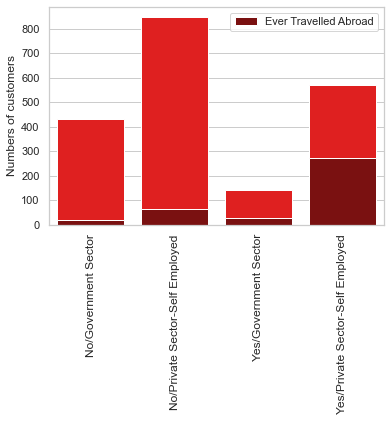

In [13]:
sns.set_theme(style="whitegrid")
sns.barplot(x=['No/Government Sector','No/Private Sector-Self Employed', 'Yes/Government Sector', 'Yes/Private Sector-Self Employed'], y=y.values, color = 'Red')
sns.barplot(x=['No/Government Sector','No/Private Sector-Self Employed', 'Yes/Government Sector', 'Yes/Private Sector-Self Employed'], y =stacked.values, color = 'Darkred', label='Ever Travelled Abroad')

plt.ylabel('Numbers of customers')
plt.xticks(rotation = 90,fontsize = 12)
plt.legend()
plt.show()


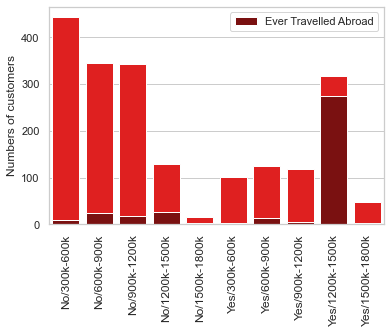

In [14]:
x2 = annual_income_results.loc[:]
y2 = annual_income_results.loc[:,('AnnualIncome', 'count_nonzero')].values
stacked2 = annual_income_results.loc[:,('EverTravelledAbroad', 'mean')].values * y2
sns.barplot(x=['No/300k-600k','No/600k-900k','No/900k-1200k','No/1200k-1500k','No/1500k-1800k','Yes/300k-600k','Yes/600k-900k','Yes/900k-1200k', 'Yes/1200k-1500k','Yes/1500k-1800k'], y=y2, color = 'Red')
sns.barplot(x=['No/300k-600k','No/600k-900k','No/900k-1200k','No/1200k-1500k','No/1500k-1800k','Yes/300k-600k','Yes/600k-900k','Yes/900k-1200k', 'Yes/1200k-1500k','Yes/1500k-1800k'], y =stacked2, color = 'Darkred', label='Ever Travelled Abroad')

plt.ylabel('Numbers of customers')
plt.xticks(rotation = 90,fontsize = 12)
plt.legend()
plt.show()


71% with income between 1200k and 1800k are customers (318/448)

86% of those travel abroad

76% with above of 1500k income are customers (48/63)

6% of those travel abroad

Conclusion

No insurance, 
Not frequently, 
Not abroad, 
Less 1200k annual income

With insurance, 
Travel frequently/abroad, 
Abroad, 
More than 1200k annual income/frequently/abroad

Answers

For frequent flyers is 50-50, 
Most likely for travel abroad